<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/22_11_4677_Sakti_Random_Forest_Teori9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data = {
    "OUTLOOK": ["Sunny", "Sunny", "Cloudy", "Rainy", "Sunny", "Rainy", "Cloudy", "Sunny", "Rainy", "Cloudy", "Sunny", "Cloudy", "Cloudy", "Rainy"],
    "TEMPERATURE": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Mild", "Mild", "Mild", "Mild", "Mild", "Mild"],
    "HUMIDITY": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "High", "High"],
    "WINDY": [False, True, False, False, False, True, True, False, False, True, True, True, False, True],
    "PLAY": ["No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

In [3]:
df = pd.DataFrame(data)

In [6]:
# Mengonversi nilai kategorikal menjadi numerik
labelencoder = LabelEncoder()
for column in ["OUTLOOK", "TEMPERATURE", "HUMIDITY", "PLAY"]:
    df[column] = labelencoder.fit_transform(df[column])

In [7]:
# Memisahkan fitur (X) dan label (y)
X = df[["OUTLOOK", "TEMPERATURE", "HUMIDITY", "WINDY"]]
y = df["PLAY"]

In [8]:
# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Membuat model Random Forest
model = RandomForestClassifier(n_estimators=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

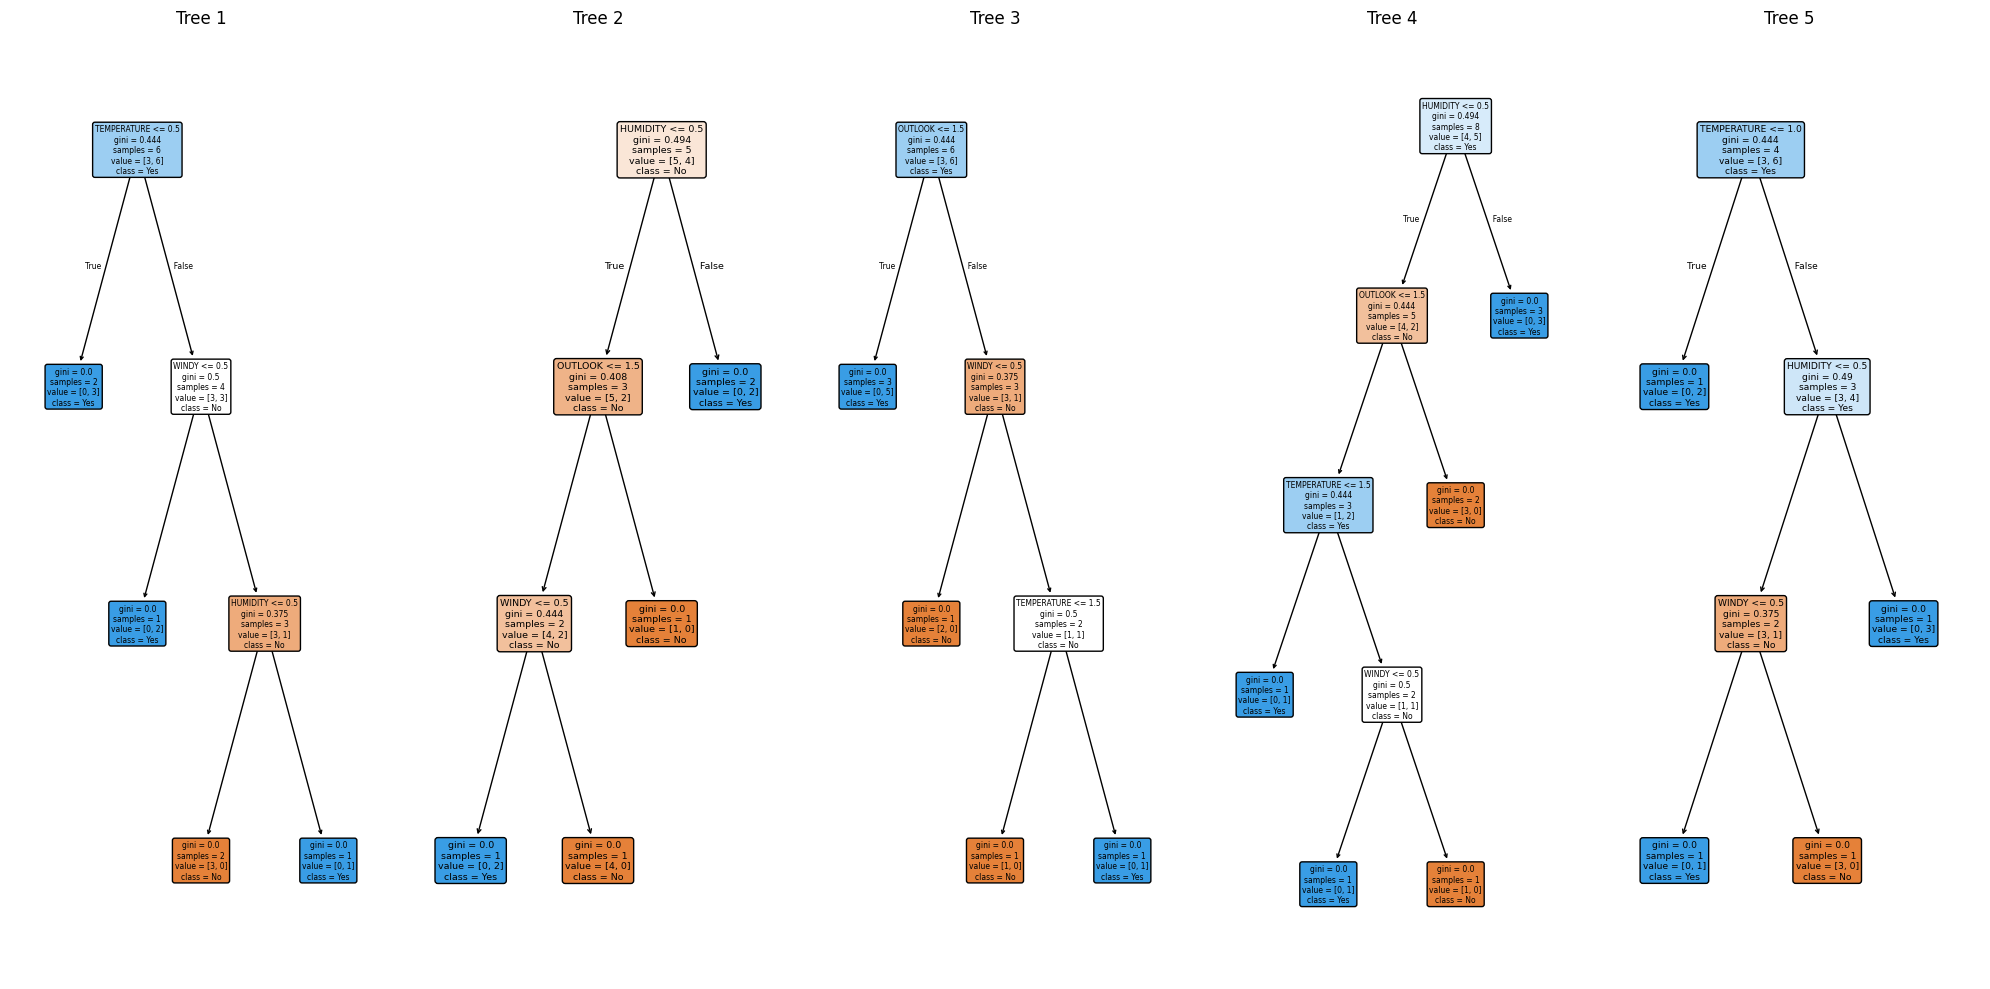

In [10]:
# Visualisasi pohon keputusan dari Random Forest
plt.figure(figsize=(20, 10))
for i, tree_in_forest in enumerate(model.estimators_):
    plt.subplot(1, 5, i + 1)
    tree.plot_tree(tree_in_forest, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()